# Part 3: Predictive Modeling

## 1. Read data

In [1]:
#read data

import pandas as pd

df_part3 = pd.read_json('ultimate_data_challenge.json', keep_default_dates=True, convert_dates=['signup_date', 'last_trip_date'])
df_part3.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [2]:
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

All datatypes appear to be correct

In [3]:
df_part3.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000,41878.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,2014-01-16 13:04:20.352000,4.601559,1.074764,2014-04-19 08:02:04.992000256,8.849536,60.926084,5.796827,4.778158
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-14 00:00:00,0.000000,33.300000,2.420000,4.700000
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-08 00:00:00,0.000000,66.700000,3.880000,5.000000
75%,3.000000,2014-01-24 00:00:00,5.000000,1.050000,2014-06-18 00:00:00,8.600000,100.000000,6.940000,5.000000
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000
std,3.792684,NaN,0.617338,0.222336,NaN,19.958811,37.081503,5.707357,0.446652


## 2. Data Wrangling

In [12]:
#check for null values
df_part3.isnull().sum()/len(df_part3)

city                      0.00000
trips_in_first_30_days    0.00000
signup_date               0.00000
avg_rating_of_driver      0.16244
avg_surge                 0.00000
last_trip_date            0.00000
phone                     0.00792
surge_pct                 0.00000
ultimate_black_user       0.00000
weekday_pct               0.00000
avg_dist                  0.00000
avg_rating_by_driver      0.00402
dtype: float64

`avg_rating_by_driver` and `phone` has some missing values and the % of missingness is < 5% compared to total dataset for each of these variables we can simply impute values with the mean/median or mode.

`average_rating_of_driver` has ~16% missing values so we need to evaluate cautiously before we impute it with mean/mode/median


General missingness handling principle - <br>
1. If missingness is < 5%, simple imputation (mean, median, mode) is usually safe and unlikely to bias results.
2. If missingness is 5–10%, imputation is still acceptable but requires more caution.
3. If missingness is > 10%, consider advanced imputation methods or analyze the impact of missingness before proceeding.

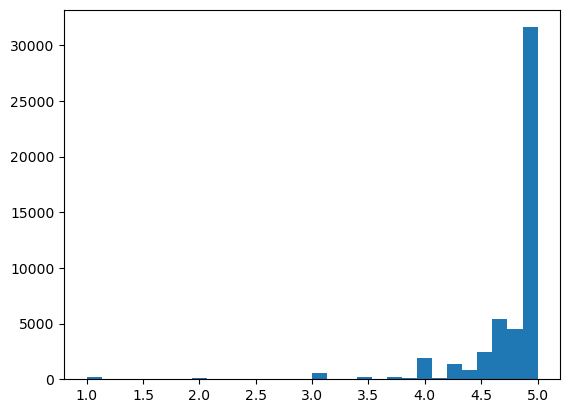

In [13]:
#check distribution of average_rating_of_driver
df_part3['avg_rating_by_driver'].value_counts()
#plot a histogram
import matplotlib.pyplot as plt
plt.hist(df_part3['avg_rating_by_driver'].dropna(), bins=30)
plt.show()

In [14]:
df_part3['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

Mean = 4.77 and Median/Mode = 5, since it is a continuous value, its safe to populate with mean.

#### 2.1 Impute `avg_rating_by_driver` with mean

In [16]:
mean_avg_rating = df_part3['avg_rating_by_driver'].mean()
df_part3.fillna({'avg_rating_by_driver': mean_avg_rating}, inplace=True)

In [19]:
df_part3['phone'].value_counts(normalize=True)

phone
iPhone     0.697162
Android    0.302838
Name: proportion, dtype: float64

#### 2.2 Impute `phone` with mode

Clearly mode is Iphone, so lets impute the missing values with iPhone.

In [20]:
mode_phone = df_part3['phone'].mode()[0]
df_part3.fillna({'phone': mode_phone}, inplace=True)

#### 2.3 Evaluate missingness of `average_rating_of_driver`

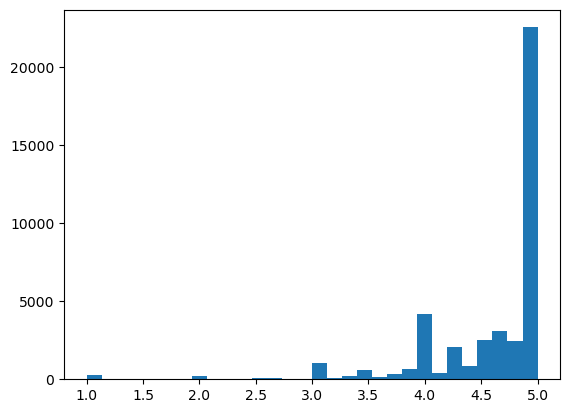

In [22]:
#check distribution of average_rating_of_driver
#plot a histogram
import matplotlib.pyplot as plt
plt.hist(df_part3['avg_rating_of_driver'].dropna(), bins=30)
plt.show()

In [24]:
#group missing values of avg_rating_of_driver by all other variables to see if there are any patterns
df_part3['avg_rating_of_driver_missing'] = df_part3['avg_rating_of_driver'].isnull().astype(int)
missing_avg_rating = df_part3[df_part3['avg_rating_of_driver_missing'] == 1]
non_missing_avg_rating = df_part3[df_part3['avg_rating_of_driver_missing'] == 0]
missing_avg_rating.describe()


,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_of_driver_missing
count,8122.000000,8122,0.0,8122.000000,8122,8122.000000,8122.000000,8122.000000,8122.000000,8122.0
mean,0.593327,2014-01-16 22:06:42.462447360,NaN,1.078210,2014-03-24 11:53:58.315685632,8.548067,59.050948,7.506267,4.785919,1.0
min,0.000000,2014-01-01 00:00:00,NaN,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,1.0
25%,0.000000,2014-01-10 00:00:00,NaN,1.000000,2014-01-26 00:00:00,0.000000,0.000000,2.410000,5.000000,1.0
50%,1.000000,2014-01-18 00:00:00,NaN,1.000000,2014-03-16 00:00:00,0.000000,100.000000,4.715000,5.000000,1.0
75%,1.000000,2014-01-25 00:00:00,NaN,1.000000,2014-05-22 00:00:00,0.000000,100.000000,10.720000,5.000000,1.0
max,5.000000,2014-01-31 00:00:00,NaN,5.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000,1.0
std,0.606755,NaN,NaN,0.310306,NaN,26.578461,46.859739,7.758616,0.619551,0.0


In [25]:
non_missing_avg_rating.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_of_driver_missing
count,41878.000000,41878,41878.000000,41878.000000,41878,41878.000000,41878.000000,41878.000000,41878.000000,41878.0
mean,2.604972,2014-01-16 11:19:08.994699008,4.601559,1.074095,2014-04-24 08:18:23.089928192,8.908004,61.289756,5.465290,4.776653,0.0
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000,0.0
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-23 00:00:00,0.000000,37.500000,2.420000,4.700000,0.0
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-16 00:00:00,0.000000,66.700000,3.790000,5.000000,0.0
75%,3.000000,2014-01-24 00:00:00,5.000000,1.070000,2014-06-20 00:00:00,11.100000,100.000000,6.490000,5.000000,0.0
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,79.690000,5.000000,0.0
std,4.055311,NaN,0.617338,0.200861,NaN,18.401140,34.858046,5.151833,0.403462,0.0


From this quick summary we can see that `avg_rating_of_driver` missingness can be attributed to fewer `trips_in_first_30_days` (the maximum number of trips these folks have made is 5 in the past 30 days, with mean as 0.5).

We also notice that the avg_dist of these missing rows is significantly higher than the non-missing rows, this could suggest that they were potentially one time users of Ultimate platforms. We should also do this analysis across categorical features

In [26]:
# compare dataframes missing_avg_rating and non_missing_avg_rating across categorical variables
categorical_vars = ['city', 'phone', 'ultimate_black_user']
for var in categorical_vars:
    print(f"Value counts for {var} in missing_avg_rating:")
    print(missing_avg_rating[var].value_counts(normalize=True))
    print(f"Value counts for {var} in non_missing_avg_rating:")
    print(non_missing_avg_rating[var].value_counts(normalize=True))
    print("\n")

Value counts for city in missing_avg_rating:
city
Winterfell        0.486580
Astapor           0.355454
King's Landing    0.157966
Name: proportion, dtype: float64
Value counts for city in non_missing_avg_rating:
city
Winterfell        0.462868
Astapor           0.325875
King's Landing    0.211257
Name: proportion, dtype: float64


Value counts for phone in missing_avg_rating:
phone
iPhone     0.644423
Android    0.355577
Name: proportion, dtype: float64
Value counts for phone in non_missing_avg_rating:
phone
iPhone     0.710254
Android    0.289746
Name: proportion, dtype: float64


Value counts for ultimate_black_user in missing_avg_rating:
ultimate_black_user
False    0.66326
True     0.33674
Name: proportion, dtype: float64
Value counts for ultimate_black_user in non_missing_avg_rating:
ultimate_black_user
False    0.615096
True     0.384904
Name: proportion, dtype: float64




We notice that there could be a relationship between `avg_rating_of_driver` to `phone` as well. From our above observations we need to keep our missing values as it is since there is a significant trend with our outcome variable `trips_in_first_30_days`

### Since our aim is to predict customer retention, let's introduce a new categoriacal `customer_retention` variable that is assigned based on `trips_in_first_30_days` , i.e if `trips_in_first_30_days` > 0 then assign 1 else 0

In [27]:
#add new variable customer_retention based on trips_in_first_30_days
df_part3['customer_retention'] = (df_part3['trips_in_first_30_days'] > 0).astype(int)

In [28]:
df_part3.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_of_driver_missing,customer_retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,1


In [29]:
df_part3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   city                          50000 non-null  object        
 1   trips_in_first_30_days        50000 non-null  int64         
 2   signup_date                   50000 non-null  datetime64[ns]
 3   avg_rating_of_driver          41878 non-null  float64       
 4   avg_surge                     50000 non-null  float64       
 5   last_trip_date                50000 non-null  datetime64[ns]
 6   phone                         50000 non-null  object        
 7   surge_pct                     50000 non-null  float64       
 8   ultimate_black_user           50000 non-null  bool          
 9   weekday_pct                   50000 non-null  float64       
 10  avg_dist                      50000 non-null  float64       
 11  avg_rating_by_driver        

In [30]:
#
df_part3['customer_retention'].value_counts(normalize=True)

customer_retention
1    0.6922
0    0.3078
Name: proportion, dtype: float64

### We notice that ~69% of riders were retained by Ultimate and ~31 were not retained based on ground truth data

## NOTE: general pricinples on Handling Missing values

### Analyzing Impact of Missingness (>10%)

### 1. **Analyze Impact**
- **Check if missingness is random:**  
  - Use missingness indicator (`isnull()`) and compare with other variables (see if missingness is related to outcome or predictors).
  - Use statistical tests (Chi-square for categorical, t-test/ANOVA for continuous).
- **Compare distributions:**  
  - Compare summary statistics and distributions of other variables for missing vs. non-missing groups.
- **Model missingness:**  
  - Build a model to predict missingness using other features. If prediction is good, missingness is not random.

### 2. **Advanced Imputation Methods**

#### **For Continuous Variables**
- **KNN Imputation:**  
  - Impute missing values using the mean of k-nearest neighbors.
  - Good for data with similar patterns among samples.
  - Use `sklearn.impute.KNNImputer`.

- **Regression Imputation:**  
  - Predict missing values using regression models trained on non-missing data.
  - Can use linear regression or more complex models.

- **Multiple Imputation (MICE):**  
  - Iteratively imputes missing values using chained equations.
  - Accounts for uncertainty by creating multiple imputed datasets.
  - Use `statsmodels.imputation.mice` or `fancyimpute`.

#### **For Categorical Variables**
- **Mode Imputation:**  
  - Impute with most frequent value (only if missingness is random and % is not too high).
- **Predictive Imputation:**  
  - Use classification models (e.g., logistic regression, decision trees) to predict missing category.
- **MICE for categorical:**  
  - MICE can also handle categorical variables using logistic regression or similar methods.

#### **For Time Series**
- **Interpolation:**  
  - Use linear, polynomial, or spline interpolation for missing values.
- **Forward/Backward Fill:**  
  - Fill missing values with previous or next observed value (useful for ordered data).

### 3. **Type of Problem Statement**

- **Prediction/Classification:**  
  - Imputation should not introduce bias that affects target variable.
  - Advanced methods (KNN, MICE) preserve relationships between features.
  - If missingness is related to target, consider including missingness indicator as a feature.

- **Clustering/Unsupervised:**  
  - Imputation should preserve natural groupings.
  - KNN or MICE are preferred over mean/mode.

### 4. **Choosing the Right Model**

- **Tree-based models (Random Forest, XGBoost):**  
  - Can handle missing values natively or with missingness indicators.
  - Less sensitive to imputation method.

- **Linear models (Logistic/Linear Regression):**  
  - Require complete data; imputation method can affect results.
  - Advanced imputation (MICE, regression) is preferred.

- **Deep Learning:**  
  - Requires complete data; use advanced imputation or mask missing values.

**Summary:**  
- For >10% missingness, always analyze if missingness is random and its impact.
- Use advanced imputation (KNN, MICE, regression) for continuous; predictive/classification for categorical.
- Choose models that are robust to imputation or include missingness indicators if appropriate.